In [1]:
#importing Libraries
import pandas as pd # for dataframe
import numpy as np  
%matplotlib inline
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization
from pandas_profiling import ProfileReport

In [2]:
#reading data
df = pd.read_csv('echocardiogram.csv', error_bad_lines=False,na_values="?")

In [3]:
df.head()

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,name,group,alive-at-1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000,name,1,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,name,1,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,name,1,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,name,1,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,name,1,0.0


# Exploring  data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 13 columns):
survival                 130 non-null float64
still-alive              131 non-null float64
age-at-heart-attack      126 non-null float64
pericardial-effusion     132 non-null float64
fractional-shortening    124 non-null float64
epss                     117 non-null float64
lvdd                     121 non-null float64
wall-motion-score        128 non-null float64
wall-motion-index        130 non-null float64
mult                     129 non-null float64
name                     131 non-null object
group                    110 non-null object
alive-at-1               75 non-null float64
dtypes: float64(11), object(2)
memory usage: 13.6+ KB


In [5]:
#delete unnecessary data
df.drop(['group','name','mult'],axis=1,inplace=True)

 alive-at-1 -- Boolean-valued. Derived from the first two attributes.
                     0 means patient was either dead after 1 year or had
                     been followed for less than 1 year.  1 means patient 
                     was alive at 1 year

In [6]:
# df[still alive at 1 ] =df[survaival] <=12 and df[still alive] =1
x=[]
for i in range (len(df)):
    if (df['survival'].iloc[i]<=12.0) and (df['still-alive'].iloc[i]==1):
        x.append(1)
    else :
        x.append(0)

In [7]:
df['alive-at-1'] == x
#The section which equals False is basically because the values ​​equals Nan
# so i will replace them and fill nan

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24     False
25     False
26     False
27     False
28     False
29      True
       ...  
103     True
104    False
105     True
106     True
107     True
108    False
109     True
110     True
111    False
112    False
113    False
114    False
115    False
116    False
117    False
118    False
119    False
120    False
121    False
122    False
123    False
124    False
125    False
126    False
127    False
128    False
129    False
130    False
131    False
132    False
Name: alive-at-1, Length: 133, dtype: bool

In [8]:
df['alive-at-1'] = x

In [9]:
df.shape

(133, 10)

In [10]:
from pandas_profiling import ProfileReport
ProfileReport(df)

Number of variables,10
Number of observations,133
Total Missing (%),4.4%
Total size in memory,10.5 KiB
Average record size in memory,80.6 B
Numeric,9
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


# processing  data

In [11]:
df.head()

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,alive-at-1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0


In [12]:
#Find out how many nan values ​​ in the data
df.isnull().sum()

survival                  3
still-alive               2
age-at-heart-attack       7
pericardial-effusion      1
fractional-shortening     9
epss                     16
lvdd                     12
wall-motion-score         5
wall-motion-index         3
alive-at-1                0
dtype: int64

In [13]:
#survival -- the number of months patient survived (has survived,
#  if patient is still alive).  Because all the patients
#  had their heart attacks at different times, it is 
#  possible that some patients have survived less than
#  one year but they are still alive.  Check the second
#  variable to confirm this.  Such patients cannot be 
#  used for the prediction task mentioned above. 
df['survival'].describe()

count    130.000000
mean      22.182923
std       15.858267
min        0.030000
25%        7.875000
50%       23.500000
75%       33.000000
max       57.000000
Name: survival, dtype: float64

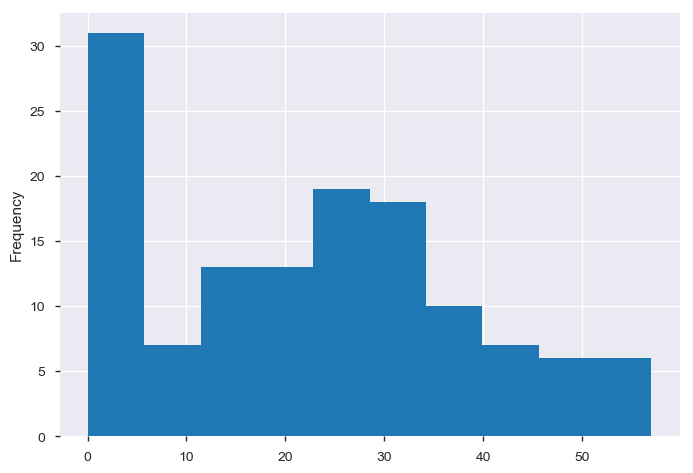

In [14]:
# making a histogram
df['survival'].plot(kind='hist')

In [15]:
# filling missing value with mean
df['survival'].fillna(22.18,inplace=True)

In [16]:
# convert still alive column to a categorical type
df['still-alive']=pd.Categorical(df['still-alive'])

In [17]:
df['still-alive'].value_counts()

0.0    88
1.0    43
Name: still-alive, dtype: int64

In [18]:
# filling missing value
df['still-alive'].fillna(0.0, inplace=True)

In [19]:
# knowng the count of each value in the column
df['still-alive'].value_counts()

0.0    90
1.0    43
Name: still-alive, dtype: int64

In [20]:
# kowing a statistiacl information about this column
df['age-at-heart-attack'].describe()

count    126.000000
mean      62.813722
std        8.342110
min       35.000000
25%       57.000000
50%       62.000000
75%       67.750000
max       86.000000
Name: age-at-heart-attack, dtype: float64

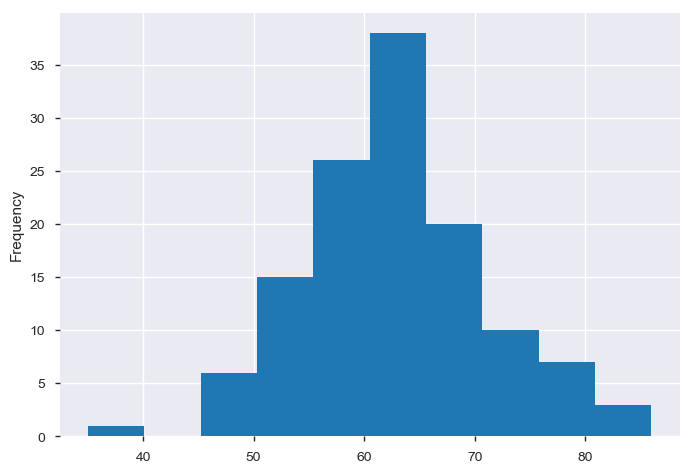

In [21]:
#making a histogram
df['age-at-heart-attack'].plot(kind='hist')

In [22]:
# filling miss value
df['age-at-heart-attack'].fillna(62.000,inplace=True)

In [23]:
# showing the first 5 rows in the data
df.head()

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,alive-at-1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0


In [24]:
df['pericardial-effusion'].value_counts()

0.0     107
1.0      24
77.0      1
Name: pericardial-effusion, dtype: int64

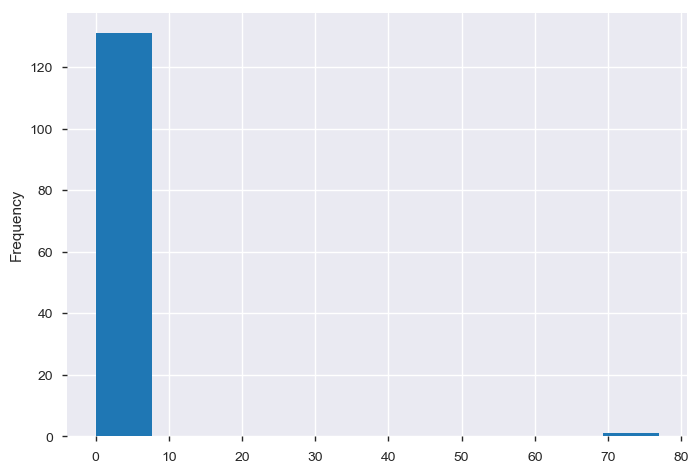

In [25]:
#making a histogram
df['pericardial-effusion'].plot(kind='hist')

In [26]:
df['pericardial-effusion'].replace(77.0,np.nan,inplace=True)

In [27]:
# fill missing value
df['pericardial-effusion'].fillna(0.0,inplace=True)

In [28]:
# convert to categorical type
df['pericardial-effusion']=pd.Categorical(df['pericardial-effusion'])

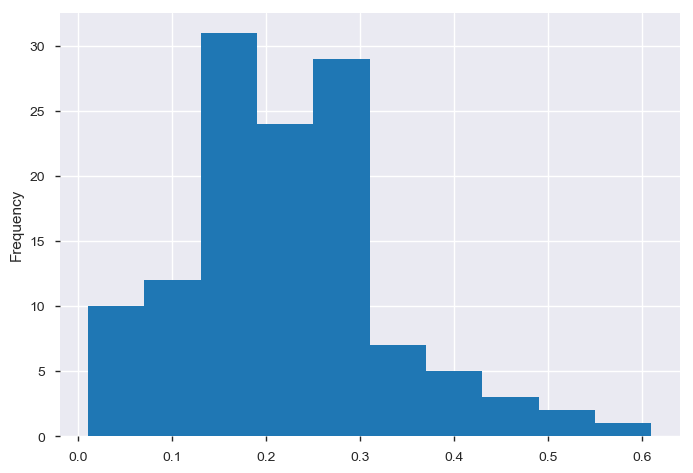

In [29]:
#making a histogram
df['fractional-shortening'].plot(kind='hist')

In [30]:
# kowing a statistiacl information about this column
df['fractional-shortening'].describe()

count    124.000000
mean       0.216734
std        0.107513
min        0.010000
25%        0.150000
50%        0.205000
75%        0.270000
max        0.610000
Name: fractional-shortening, dtype: float64

In [31]:
#fill missing value
df['fractional-shortening'].fillna(0.216,inplace=True)

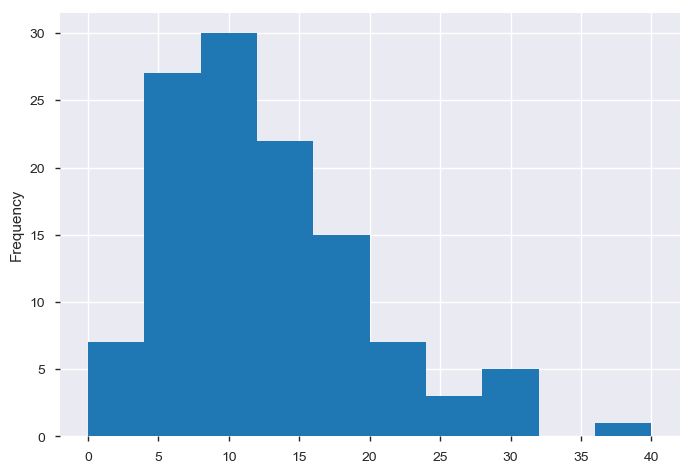

In [32]:
#making a histogram
df['epss'].plot(kind='hist')

In [33]:
## kowing a statistiacl information about this column
df['epss'].describe()

count    117.000000
mean      12.164769
std        7.370159
min        0.000000
25%        7.000000
50%       11.000000
75%       16.100000
max       40.000000
Name: epss, dtype: float64

In [34]:
df['epss'].fillna(11.000,inplace=True)

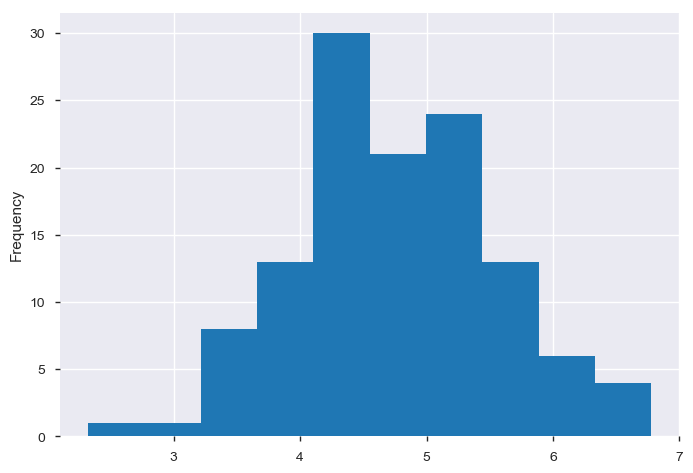

In [35]:

df['lvdd'].plot(kind='hist')

In [36]:
## kowing a statistiacl information about this column
df['lvdd'].describe()

count    121.000000
mean       4.763157
std        0.810013
min        2.320000
25%        4.230000
50%        4.650000
75%        5.300000
max        6.780000
Name: lvdd, dtype: float64

In [37]:
df['lvdd'].fillna(4.763,inplace=True)

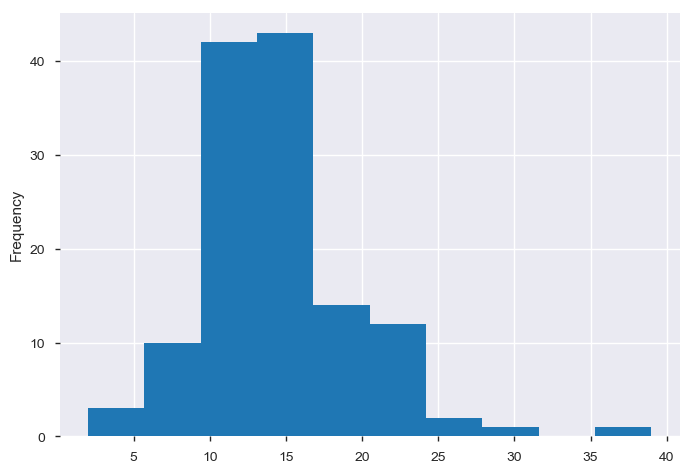

In [38]:
df['wall-motion-score'].plot(kind='hist')

In [39]:
df['wall-motion-score'].describe()

count    128.000000
mean      14.438125
std        5.018566
min        2.000000
25%       11.000000
50%       14.000000
75%       16.500000
max       39.000000
Name: wall-motion-score, dtype: float64

In [40]:
df['wall-motion-score'].fillna(14.000,inplace=True)

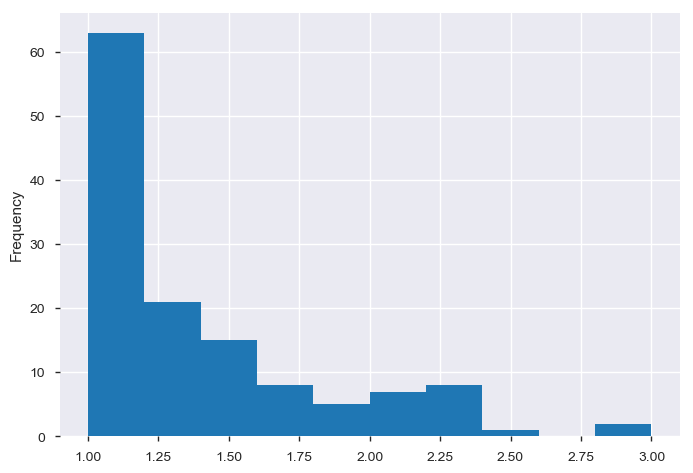

In [41]:
df['wall-motion-index'].plot(kind='hist')

In [42]:
#quals wall-motion-score divided by number of
#  segments seen.  Usually 12-13 segments are seen
#   in an echocardiogram.  Use this variable INSTEAD
#  of the wall motion score, so i will delete it
df.drop('wall-motion-index',axis=1,inplace=True)

In [43]:
df.head()

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,alive-at-1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,0


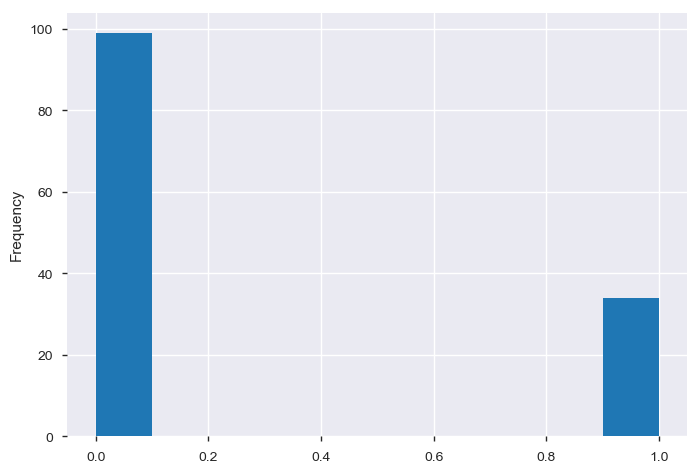

In [44]:
df['alive-at-1'].plot(kind='hist')

# visualizing  and explore data analysis

In [45]:
df.head()

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,alive-at-1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,0


In [46]:
def line(x,n):
    plt.figure(figsize=(20,8))
    plt.subplot(2,3,n)
    df[x].plot()

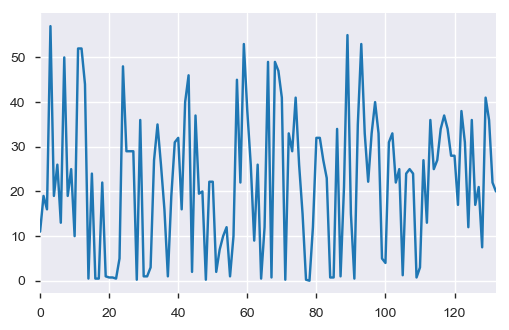

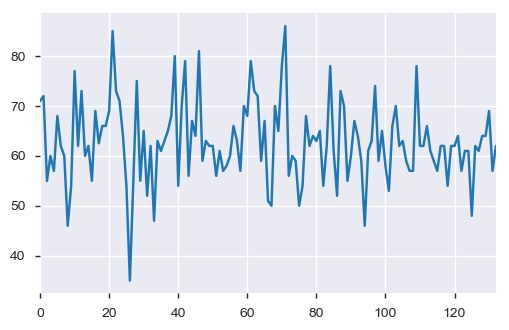

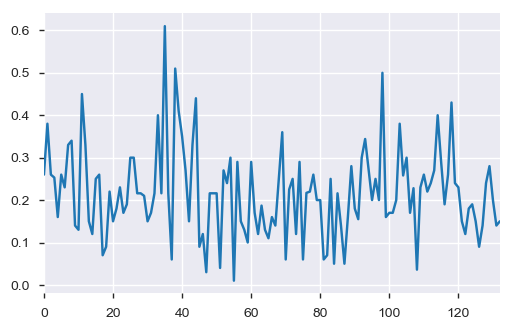

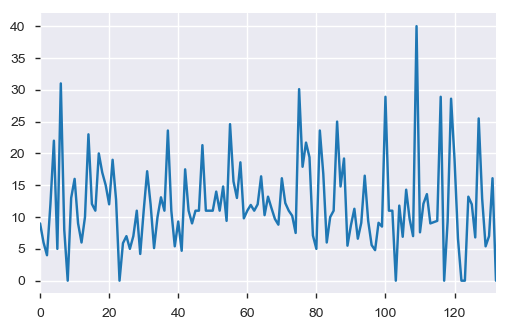

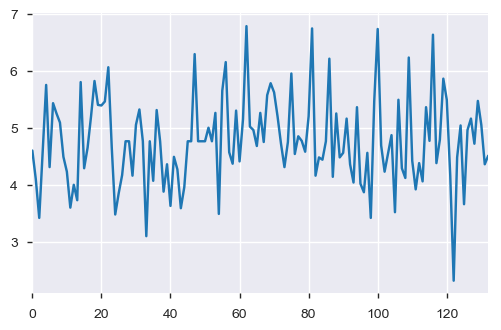

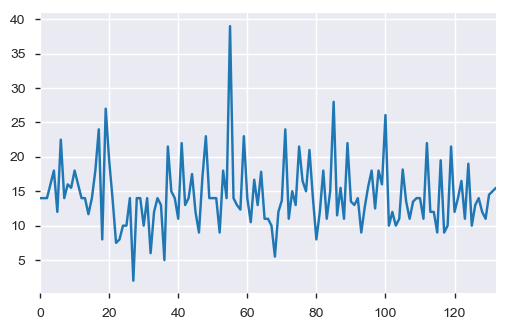

In [47]:
line('survival',1)
plt.title='survival'
line('age-at-heart-attack',2)
line('fractional-shortening',3)
line('epss',4)
line('lvdd',5)
line('wall-motion-score',6)

In [48]:
df.head()

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,alive-at-1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,0


In [62]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [63]:
df['survival'].iplot(kind='scatter',mode='markers',size=10)

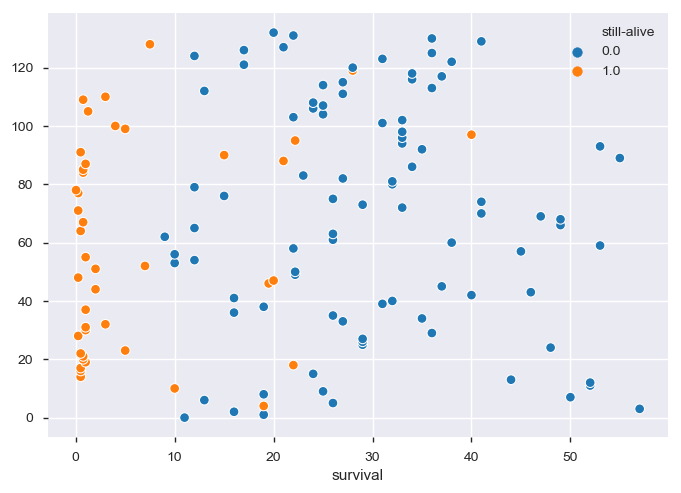

In [64]:
sns.scatterplot(x= df['survival'],y=df.index,hue='still-alive',data=df)

In [65]:
(df['survival'][df['still-alive']==1]).describe()

count    43.000000
mean      6.301395
std       9.473917
min       0.030000
25%       0.625000
50%       1.000000
75%       7.250000
max      40.000000
Name: survival, dtype: float64

In [66]:
(df['survival'][df['still-alive']==0]).describe()

count    90.000000
mean     29.770667
std      11.919473
min       9.000000
25%      22.000000
50%      29.000000
75%      36.000000
max      57.000000
Name: survival, dtype: float64

In [67]:
(df['survival'][df['still-alive']==0]).describe()

count    90.000000
mean     29.770667
std      11.919473
min       9.000000
25%      22.000000
50%      29.000000
75%      36.000000
max      57.000000
Name: survival, dtype: float64

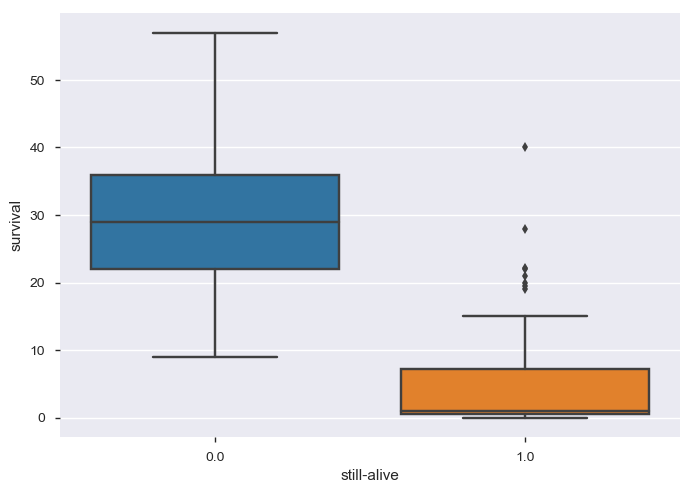

In [68]:
sns.boxplot(y='survival', x='still-alive',data=df)

 Now we can see that most of the time the patient does not live more than 10 months 

In [69]:
df['age-at-heart-attack'].iplot(kind='scatter')

In [70]:
df['age-at-heart-attack'].iplot(kind='scatter',mode='markers',size=10)

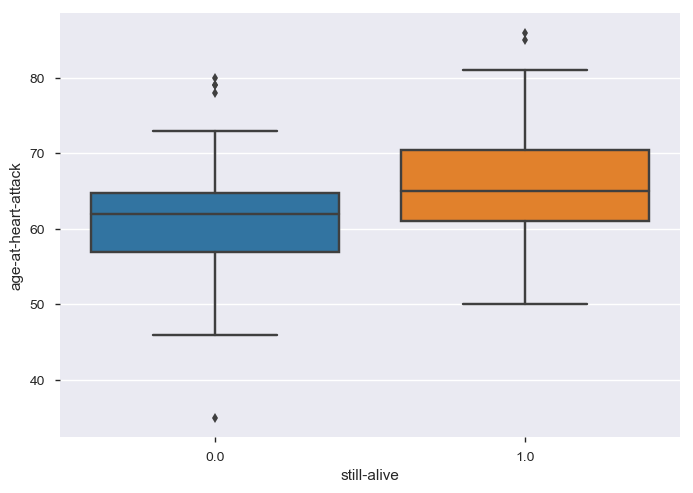

In [71]:
sns.boxplot(x='still-alive',y='age-at-heart-attack',data=df)

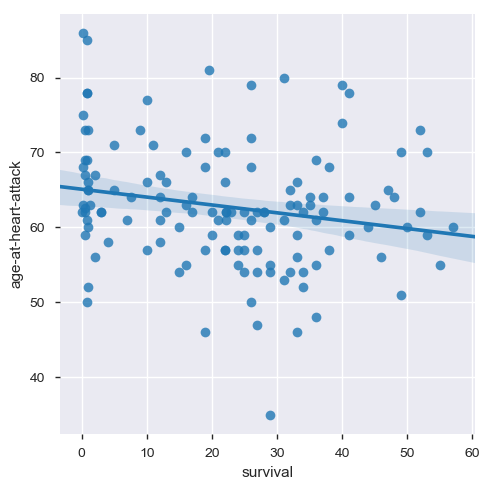

In [72]:
sns.lmplot(x='survival',y='age-at-heart-attack',data=df)

Now we can see that if the patient had a heart attack at an older age, the number of months the patient would survive would decrease.

In [73]:
df.head()

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,alive-at-1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,0


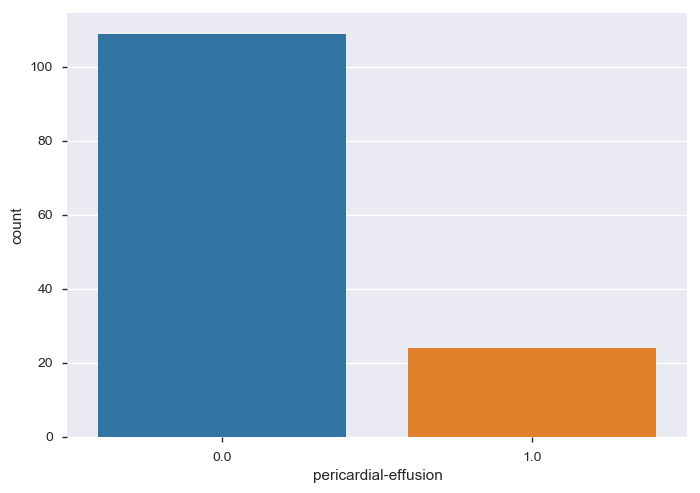

In [74]:
# showing the count for each value
sns.countplot(df['pericardial-effusion'])

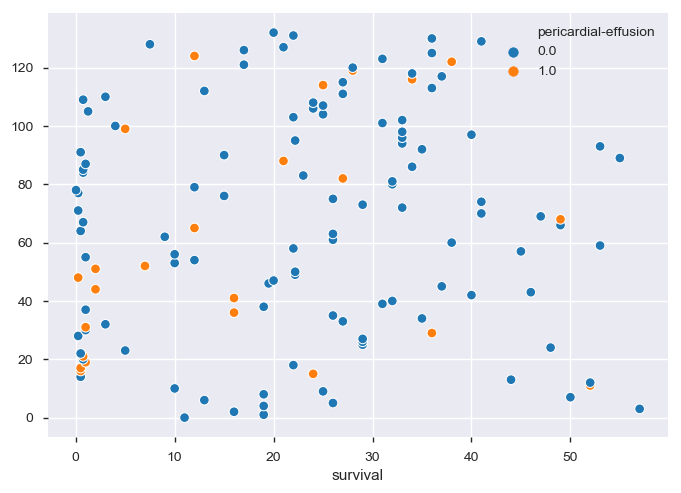

In [75]:
# Show data distribution
sns.scatterplot(x= df['survival'],y=df.index,hue='pericardial-effusion',data=df)

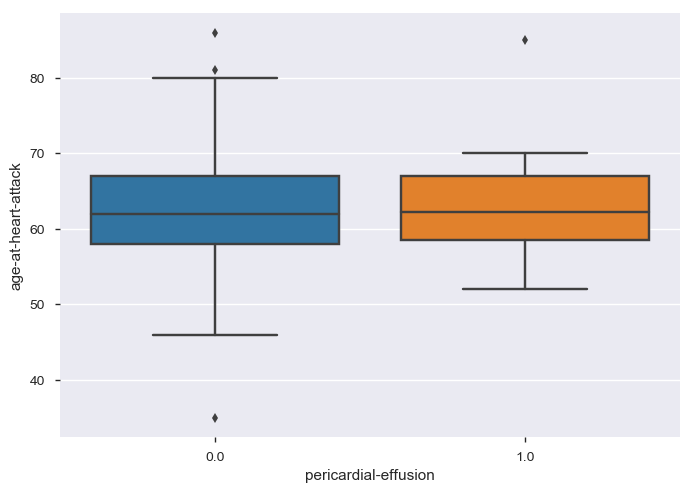

In [76]:
sns.boxplot(x='pericardial-effusion',y='age-at-heart-attack',data=df)

In [77]:
df.head()

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,alive-at-1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,0


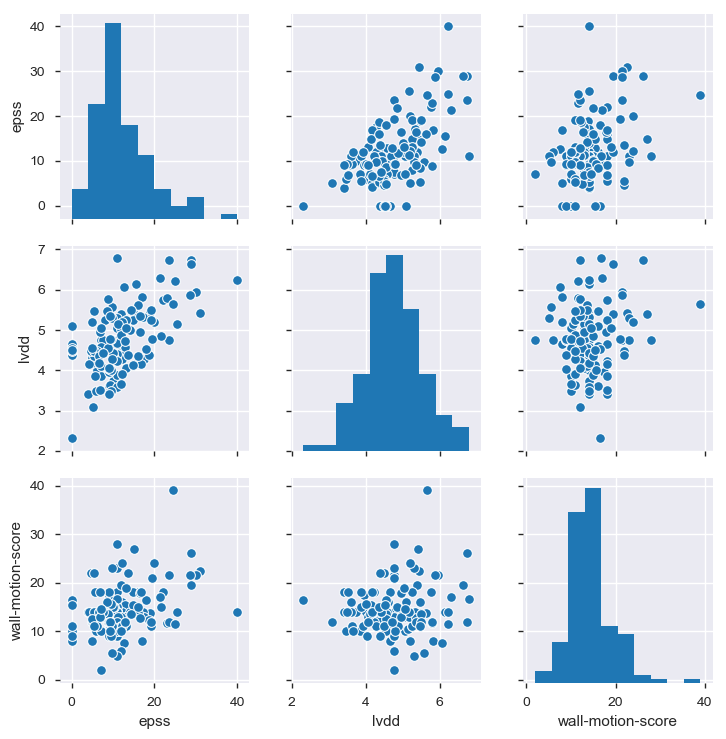

In [78]:
sns.pairplot(df[['epss','lvdd','wall-motion-score']])

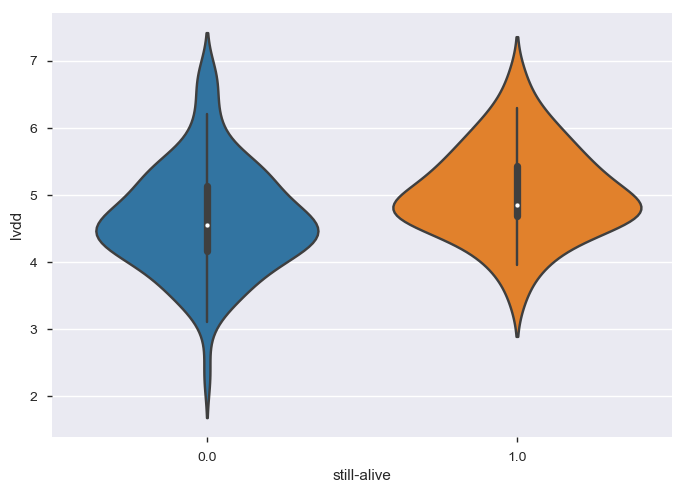

In [79]:
#Show data distribution
sns.violinplot(y=df['lvdd'],x=df['still-alive'])

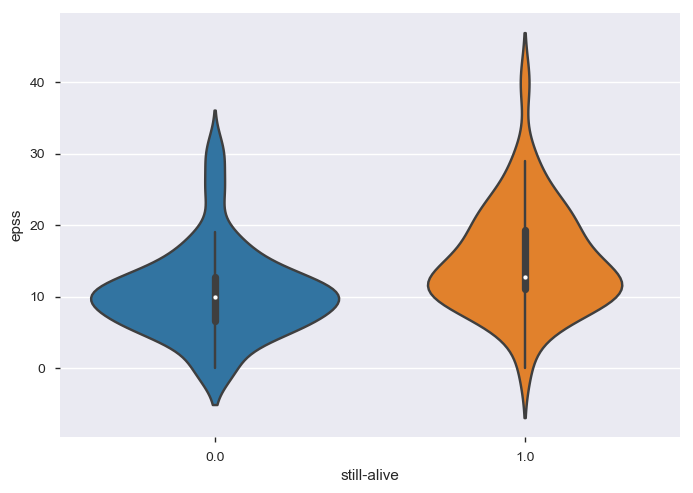

In [80]:
#Show data distribution
sns.violinplot(y=df['epss'],x=df['still-alive'])

In [81]:
df.head()

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,alive-at-1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,0


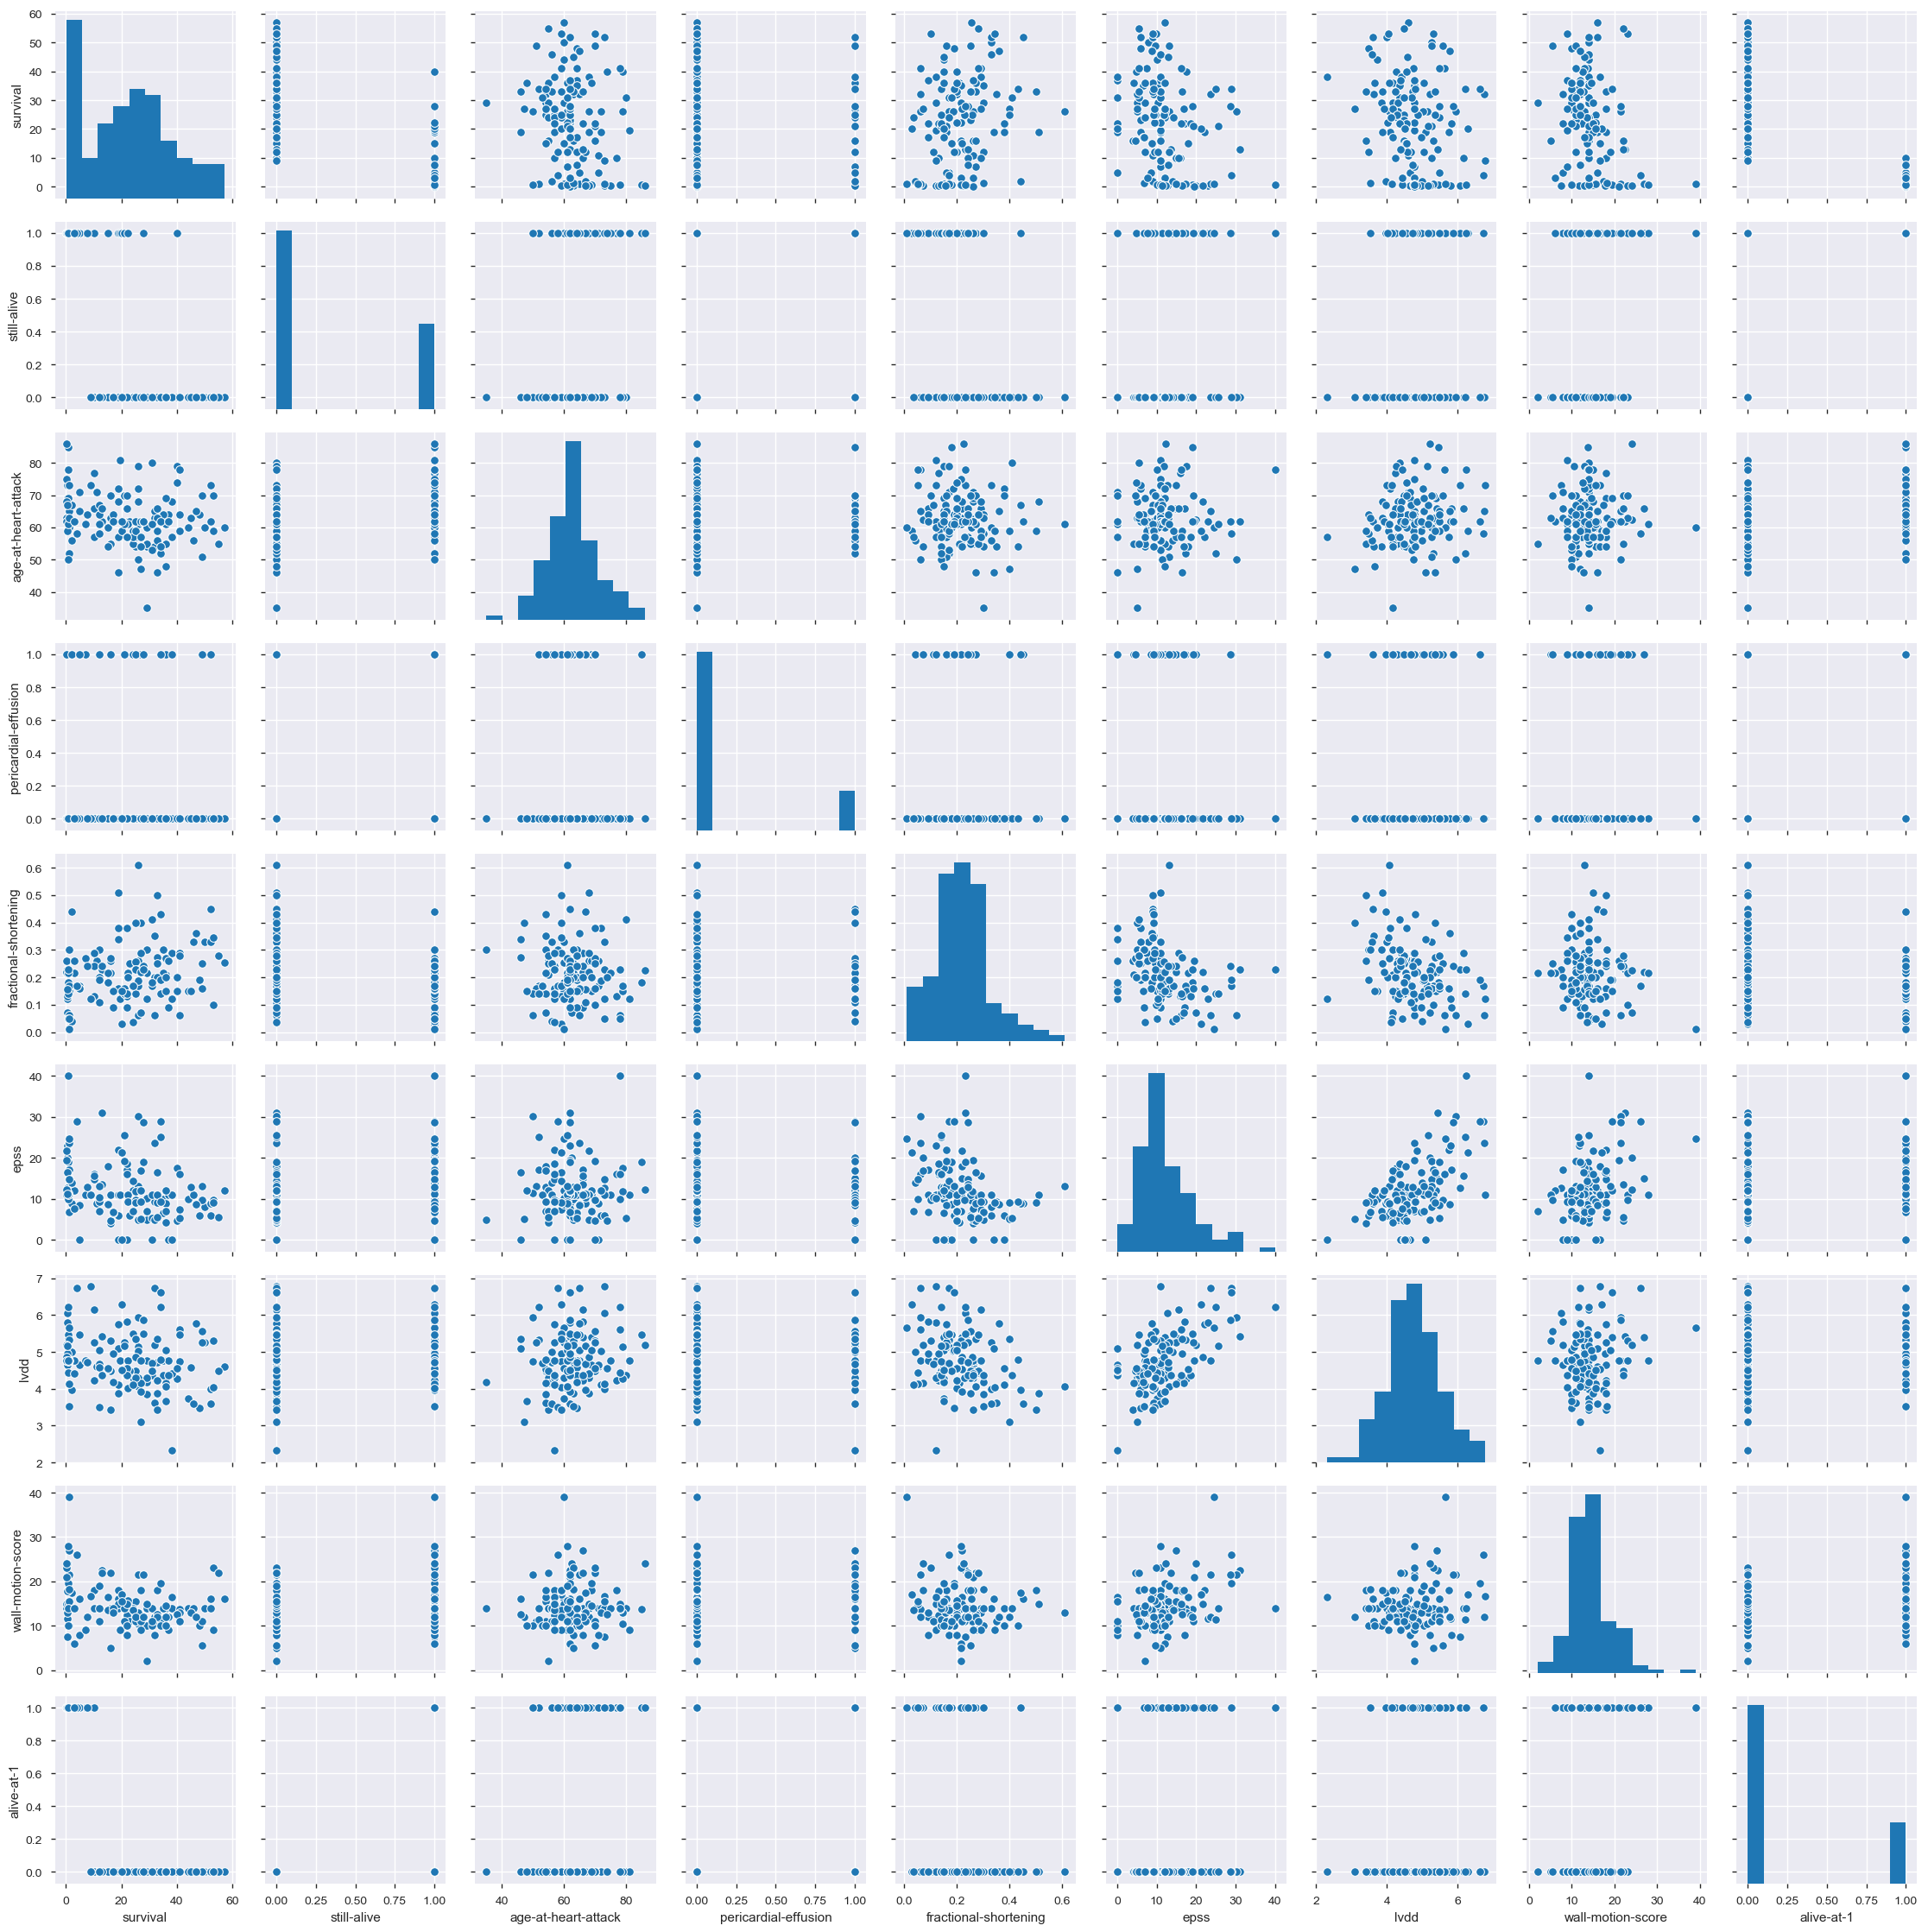

In [88]:
df['alive-at-1']=pd.Categorical(df['alive-at-1'])
sns.pairplot(df)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 9 columns):
survival                 133 non-null float64
still-alive              133 non-null float64
age-at-heart-attack      133 non-null float64
pericardial-effusion     133 non-null float64
fractional-shortening    133 non-null float64
epss                     133 non-null float64
lvdd                     133 non-null float64
wall-motion-score        133 non-null float64
alive-at-1               133 non-null category
dtypes: category(1), float64(8)
memory usage: 8.6 KB


In [90]:
df.head()

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,alive-at-1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,0.0


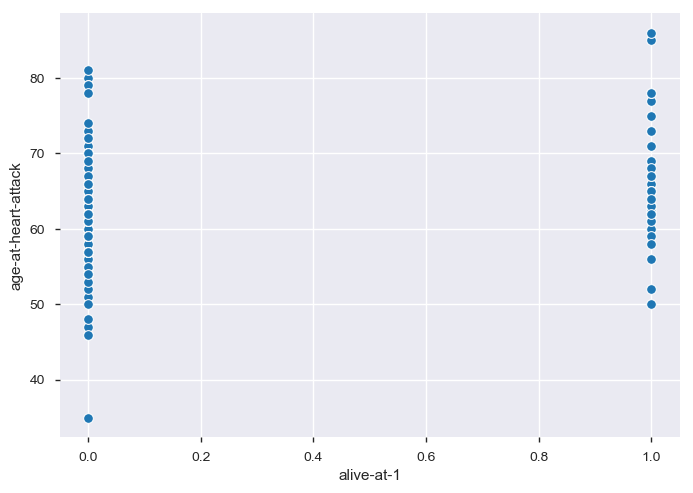

In [91]:
sns.scatterplot(x=df['alive-at-1'],y=df['age-at-heart-attack'])

In [96]:
df['alive-at-1'].iplot(kind='scatter',mode='markers',size=10)

In [92]:
df['still-alive']=df['still-alive'].astype(float)
df['pericardial-effusion']=df['pericardial-effusion'].astype(float)
df['alive-at-1']=df['alive-at-1'].astype(float)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 9 columns):
survival                 133 non-null float64
still-alive              133 non-null float64
age-at-heart-attack      133 non-null float64
pericardial-effusion     133 non-null float64
fractional-shortening    133 non-null float64
epss                     133 non-null float64
lvdd                     133 non-null float64
wall-motion-score        133 non-null float64
alive-at-1               133 non-null float64
dtypes: float64(9)
memory usage: 9.4 KB


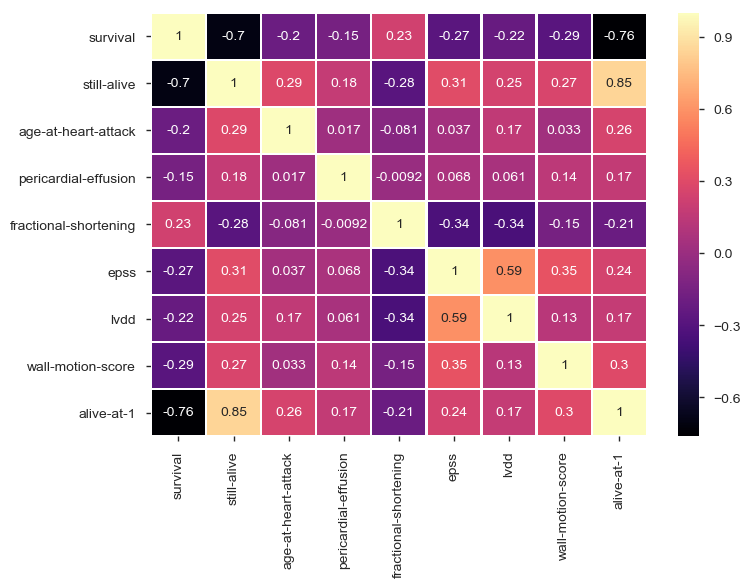

In [94]:
# Show data correlation
sns.heatmap(df.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

In [97]:
# There is a high correlation between epss and lvdd  so a will drop one of them
# and between alive-at-1 and(survaival , sill alive) so a will drop one of them
df.drop(['epss','still-alive'],axis=1,inplace=True)

In [98]:
df.head()

,survival,age-at-heart-attack,pericardial-effusion,fractional-shortening,lvdd,wall-motion-score,alive-at-1
0,11.0,71.0,0.0,0.260,4.600,14.0,0.0
1,19.0,72.0,0.0,0.380,4.100,14.0,0.0
2,16.0,55.0,0.0,0.260,3.420,14.0,0.0
3,57.0,60.0,0.0,0.253,4.603,16.0,0.0
4,19.0,57.0,0.0,0.160,5.750,18.0,0.0


# spliting the dataset into training set and test set

In [99]:
x=df.drop(['alive-at-1','lvdd'],axis=1)
y=df['alive-at-1']

In [100]:
x.head()

,survival,age-at-heart-attack,pericardial-effusion,fractional-shortening,wall-motion-score
0,11.0,71.0,0.0,0.260,14.0
1,19.0,72.0,0.0,0.380,14.0
2,16.0,55.0,0.0,0.260,14.0
3,57.0,60.0,0.0,0.253,16.0
4,19.0,57.0,0.0,0.160,18.0


In [101]:
# spliting data to traning set and test set
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test =train_test_split(x,y, test_size = 0.2 , random_state=0)

In [102]:
X_train.head()

,survival,age-at-heart-attack,pericardial-effusion,fractional-shortening,wall-motion-score
129,41.0,64.0,0.0,0.280,11.0
107,25.0,57.0,0.0,0.228,11.0
125,36.0,48.0,0.0,0.150,10.0
33,27.0,47.0,0.0,0.400,12.0
68,49.0,70.0,1.0,0.250,5.5


# doing future scaling on data and prepare it for machine learning model

In [103]:
# feture scaling (x= (x-min(x))/ max x - min x)
from sklearn.preprocessing import StandardScaler
sc_X  = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [104]:
# cnvert it to be a DataFrame
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)


In [105]:
'''
columns names
X_train.columns=['survival',
'age-at-heart-attack',
'pericardial-effusion',
'fractional-shortening',
'lvdd',
'wall-motion-score']
X_test.columns=['survival',
'age-at-heart-attack',
'pericardial-effusion',
'fractional-shortening',
'lvdd',
'wall-motion-score']
'''

"\ncolumns names\nX_train.columns=['survival',\n'age-at-heart-attack',\n'pericardial-effusion',\n'fractional-shortening',\n'lvdd',\n'wall-motion-score']\nX_test.columns=['survival',\n'age-at-heart-attack',\n'pericardial-effusion',\n'fractional-shortening',\n'lvdd',\n'wall-motion-score']\n"

In [106]:
# first five row in test set
X_test.head()

,0,1,2,3,4
0,0.801192,-2.258188,-0.49705,0.542903,-0.319574
1,1.005435,0.797806,-0.49705,-0.122923,0.042650
2,0.528867,-3.719750,-0.49705,0.801835,-0.056319
3,-0.151943,-2.258188,-0.49705,1.171739,0.339555
4,-1.377401,0.266329,-0.49705,-0.585302,-0.848065


In [107]:
# first five row in traning set
X_train.head()

,0,1,2,3,4
0,1.345840,0.133460,-0.49705,0.616884,-0.650128
1,0.256543,-0.796625,-0.49705,0.136009,-0.650128
2,1.005435,-1.992449,-0.49705,-0.585302,-0.848065
3,0.392705,-2.125318,-0.49705,1.726594,-0.452192
4,1.890488,0.930675,2.01187,0.339456,-1.738780


# Using KNN
##### Import KNeighborsClassifier from scikit learn.

In [108]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [109]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [110]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [111]:
pred = knn.predict(X_test)

In [112]:
pred

array([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 0.])

In [113]:
from sklearn.metrics import classification_report,confusion_matrix

In [114]:
confusion_matrix(y_test,pred)

array([[18,  1],
       [ 1,  7]], dtype=int64)

In [115]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        19
         1.0       0.88      0.88      0.88         8

   micro avg       0.93      0.93      0.93        27
   macro avg       0.91      0.91      0.91        27
weighted avg       0.93      0.93      0.93        27



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!


In [116]:
error_rate = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

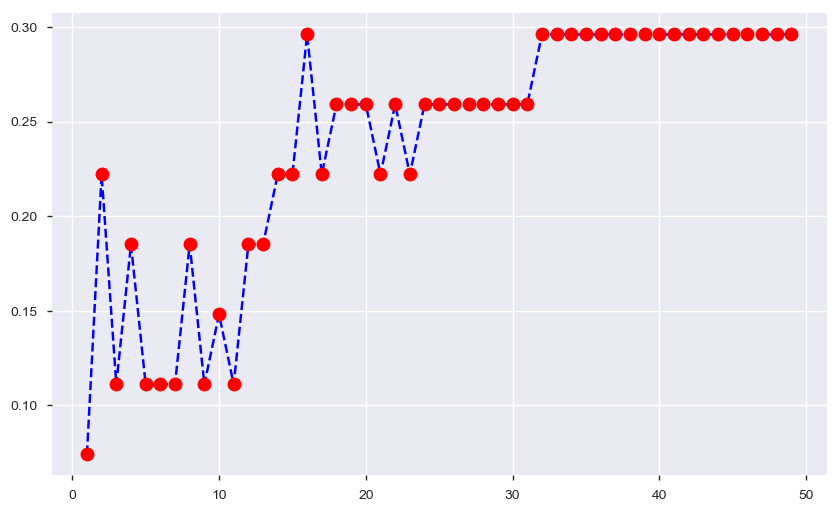

In [117]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#plt.title('Error Rate vs. K Value')
#plt.xlabel('K')
#plt.ylabel('Error Rate')


## Retrain with new K Value
**The lowest error rate at k is 17**
**Retrain your model with the best K value and re-do the classification report and the confusion matrix.**

In [118]:
# NOW WITH K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[18  1]
 [ 1  7]]


              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        19
         1.0       0.88      0.88      0.88         8

   micro avg       0.93      0.93      0.93        27
   macro avg       0.91      0.91      0.91        27
weighted avg       0.93      0.93      0.93        27



In [119]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.9259259259259259
